## GUI Cookbook with Seed1.5-VL

**Seed1.5-VL** is capable of conducting GUI agent tasks in real world GUI environments, such as computer, mobile, etc.


### 0. Obtain the API Key
register and setup a service: https://www.volcengine.com/product/doubao


In [ ]:
# Copyright (c) 2025 Bytedance Ltd. and/or its affiliates
# SPDX-License-Identifier: Apache-2.0
import io
import os
import re
import json
import base64
from PIL import Image
from io import BytesIO
from openai import OpenAI

# Please set the API key here
# os.environ['OPENAI_API_KEY'] = 'your api key'
seed_vl_version = "doubao-1-5-thinking-vision-pro-250428"
api_key = "your api key"
client = OpenAI(
    base_url="https://ark.cn-beijing.volces.com/api/v3",
    api_key=api_key,
)

### 1 Computer Use
#### 1.1 Single-turn Inference

In [52]:
from prompt import COMPUTER_USE_DOUBAO

# encode image into base64 encoding
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        image = base64.b64encode(image_file.read()).decode('utf-8')
    return image

def inference(messages):
    chat_completion = client.chat.completions.create(
        model=seed_vl_version,
        messages=messages,
        top_p=None,
        temperature=0.0,
        max_tokens=400,
        stream=True,
        seed=None,
        stop=None,
        frequency_penalty=None,
        presence_penalty=None
    )

    response = ""
    for message in chat_completion:
        response += message.choices[0].delta.content
    return response

instruction = "Could you help me set the image to Palette-Based?"
language = "English"
system_prompt = COMPUTER_USE_DOUBAO.format(instruction=instruction, language=language)
image_path = "samples/image.png"
base64_image = encode_image(image_path)
image_format = image_path.split('.')[-1]
assert image_format in ['jpg', 'jpeg', 'png', 'webp']
messages = [
    {
        "role": "user",
        "content": system_prompt
    },
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/{image_format};base64,{base64_image}"
                }
            }
        ]
    }
]
response = inference(messages)
print(response)

Thought: To proceed with setting the image to Palette-Based, I first need to close the "Preferences" dialog box, as it is not relevant to the task. Closing this dialog will clear the workspace and allow access to the main menu options needed for changing the image mode. The next step is to click the close button (X) on the "Preferences" window.

Click on the close button (X) located at the top-right corner of the "Preferences" dialog box to close it.
Action: click(point='<point>450 417</point>')


#### Multi-turn Inference
We use the same conversation concatenate logic (history-5) as UI-TARS, which contains the most recent 4 history screenshots and the current environment screenshot, add up to 5 images, and all the history model responses. For example, when inferencing 8th round, the messages should look like this:

```text
from user (system prompt)
from assistant (1st round response)
from assistant (2nd round response)
from assistant (3rd round response)
from user (4th round image)
from assistant (4th round response)
from user (5th round image)
from assistant (5th round response)
from user (6th round image)
from assistant (6th round response)
from user (7th round image)
from assistant (7th round response)
from user (8th round image)
```

In [55]:

instruction = "Could you help me set the image to Palette-Based?"
language = "Chinese"
system_prompt = COMPUTER_USE_DOUBAO.format(instruction=instruction, language=language)
image_4turn_path = "samples/image_4_turn.png"
image_5turn_path = "samples/image_5_turn.png"
image_6turn_path = "samples/image_6_turn.png"
image_7turn_path = "samples/image_7_turn.png"
image_8turn_path = "samples/image_8_turn.png"

base64_image_4turn = encode_image(image_4turn_path)
base64_image_5turn = encode_image(image_5turn_path)
base64_image_6turn = encode_image(image_6turn_path)
base64_image_7turn = encode_image(image_7turn_path)
base64_image_8turn = encode_image(image_8turn_path)
image_format = image_path.split('.')[-1]
assert image_format in ['jpg', 'jpeg', 'png', 'webp']

messages = [
    {
        "role": "user",
        "content": system_prompt
    },
    {
        "role": "assistant",
        "content": "Thought: 我看到屏幕上弹出了一个颜色配置文件转换的对话框，要继续操作的话得先处理掉它。对话框右下角有个\"Convert\"按钮，我需要点击它来确认这个转换操作。\nAction: click(point='<point>607 647</point>')"
    },
    {
        "role": "assistant",
        "content": "Thought: 看到这张复古电视机的照片，我需要把它设置成基于调色板的方式。让我先点击顶部菜单栏的\"Tools\"选项，这样就能找到相关的颜色设置选项了。\nAction: click(point='<point>220 71</point>')"
    },
    {
        "role": "assistant",
        "content": "Thought: 刚才点开了Tools菜单，但发现这不是正确的路径。要设置图片为基于调色板的方式，我需要先关闭当前打开的Tools菜单，然后重新寻找正确的颜色设置选项。让我点击一下Tools按钮把它关掉。\nAction: click(point='<point>220 71</point>')"
    },
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/{image_format};base64,{base64_image_4turn}"
                }
            }
        ]
    },
    {
        "role": "assistant",
        "content": "Thought: 刚才在Tools菜单里没找到想要的选项，让我换个思路。我注意到顶部菜单栏有个\"Colors\"选项，这应该就是处理颜色设置的地方。我需要点击它来继续寻找将图片设置为基于调色板方式的选项。\nAction: click(point='<point>192 71</point>')"
    },
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/{image_format};base64,{base64_image_5turn}"
                }
            }
        ]
    },
    {
        "role": "assistant",
        "content": "Thought: 我在Colors菜单里仔细浏览了一遍，发现这里并没有直接设置调色板的选项。看来得换个思路了 - 先把这个菜单关掉，然后去Edit菜单看看，那里应该能找到更多关于图像处理的选项。毕竟要实现基于调色板的设置，可能需要通过其他路径来实现。\nAction: click(point='<point>192 71</point>')"
    },
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/{image_format};base64,{base64_image_6turn}"
                }
            }
        ]
    },
    {
        "role": "assistant",
        "content": "Thought: 我在Colors菜单里没找到想要的选项，让我换个思路。我注意到顶部菜单栏有个\"Edit\"选项，这应该就是处理颜色设置的地方。我需要点击它来继续寻找将图片设置为基于调色板方式的选项。\nAction: click(point='<point>65 71</point>')"
    },
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/{image_format};base64,{base64_image_7turn}"
                }
            }
        ]
    },
    {
        "role": "assistant",
        "content": "Thought: 我在Edit菜单里发现了Preferences选项，这正是我需要的。通过这个选项，我应该能找到调整图片颜色模式的设置。让我点击它进入设置界面，这样就能把图片转换成基于调色板的方式了。\nAction: click(point='<point>96 602</point>')"
    },
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/{image_format};base64,{base64_image_8turn}"
                }
            }
        ]
    }
]

response = inference(messages)
print(response)

Thought: 我现在打开了Preferences窗口，但这似乎不是设置图片为Palette-Based的正确路径。这个窗口主要是系统资源相关的设置，和颜色模式转换无关。我需要先关闭这个Preferences窗口，点击"Cancel"按钮，然后重新寻找正确的颜色模式设置选项。
Action: click(point='<point>383 808</point>')


#### 1.2 Action parsing & Visualization

[0.383, 0.808, 0.383, 0.808]
import pyautogui
import time
'''
Observation:


Thought:
The Preferences window I opened isn’t the right place to set the image to Palette - Based. To get back on track, I first need to close this Preferences dialog. I’ll click the "Cancel" button at the bottom of the window. After closing it, I can look for the correct menu option, which is likely under the Image menu where color mode settings are typically located.
'''

pyautogui.click(735.36, 872.64, button='left')
[{'reflection': None, 'thought': 'The Preferences window I opened isn’t the right place to set the image to Palette - Based. To get back on track, I first need to close this Preferences dialog. I’ll click the "Cancel" button at the bottom of the window. After closing it, I can look for the correct menu option, which is likely under the Image menu where color mode settings are typically located.', 'action_type': 'click', 'action_inputs': {'start_box': '[0.383, 0.808, 0.383, 0.808]'}, 'text': 'T

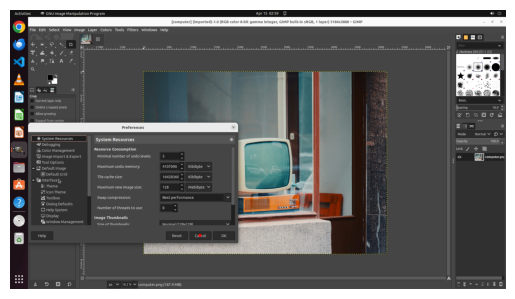

In [54]:
from action_parser import parse_action_to_structure_output, parsing_response_to_pyautogui_code

# 打开原图
image = Image.open(image_8turn_path)
original_image_width, original_image_height = image.size
model_type = "doubao"
parsed_dict = parse_action_to_structure_output(response, 1000, original_image_height, original_image_width, model_type)
parsed_pyautogui_code = parsing_response_to_pyautogui_code(parsed_dict, original_image_height, original_image_width)
print(parsed_pyautogui_code)
print(parsed_dict)

from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt


# 点坐标
start_box = parsed_dict[0]["action_inputs"]["start_box"]
coordinates = eval(start_box)  # 将字符串转换为列表



# 将相对坐标转换为绝对像素坐标
x1 = int(coordinates[0] * original_image_width)
y1 = int(coordinates[1] * original_image_height)

# 在图像上绘制标记
draw = ImageDraw.Draw(image)
radius = 5  # 标记点的半径
draw.ellipse((x1 - radius, y1 - radius, x1 + radius, y1 + radius), fill="red", outline="red")

# 将图像转换为 NumPy 数组
image_array = np.array(image)

# 在 Jupyter Notebook 中展示图像
plt.imshow(image_array)
plt.axis("off")  # 去掉坐标轴
plt.show()